https://wyatt37.tistory.com/13

In [1]:
import glob
import os
import pandas as pd
import numpy as np
import time
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
print("...beginning loading data...")
curr_file_list = glob.glob(os.path.join('../GET_DATA/preprocessing/txt/ASW/', '*txt'))

DataList=[]
c=0
for filename in sorted(curr_file_list):
    with open(filename) as file:
        data = pd.read_csv(file, sep='\t', header=None, names=['dateGMT', 'timeGMT', 'unixTime', 'lat', 'lon'])
        data["timeGMT"] = data["timeGMT"].str.replace(pat=r'\|000|\|00', repl=r'', regex=True)
        data["timeGMT"] = data["timeGMT"].str.replace(pat=r':', repl=r'', regex=True)
        data["dateGMT"] = data["dateGMT"].str.replace(pat=r'|', repl='', regex=True)
        data["unixTime"] = data["unixTime"].str.replace(pat=r'\|000|\|00', repl=r'', regex=True)
#         data["dateTimeGMT"] = pd.to_datetime(data["dateGMT"]+data["timeGMT"], format='%Y%m%d%H%M%S')
        data.drop(['dateGMT', 'timeGMT','unixTime'], axis=1, inplace=True)
        DataList.append([c,data])
        c+=1
print(DataList[0][1].head())
#         print(data)
#         print(length)
#         print(data["unixTime"][0])

...beginning loading data...
         lat         lon
0  37.550163  126.924373
1  37.550070  126.924358
2  37.550213  126.924282
3  37.550138  126.924270
4  37.550030  126.924095


https://3months.tistory.com/168

window만들기만 하면 끝

training, testing dataset 분리

In [2]:
def split(data):
    l=int(len(data)*0.6)
    
    train=data.loc[:l]
    test=data.loc[l:]
    
    return [train,test]
    

In [3]:
t=int(input('dataset: '))

dataset: 4


In [4]:
train_data,test_data=split(DataList[t][1])

In [5]:
train_data

,lat,lon
0,37.543767,126.928170
1,37.543825,126.928020
2,37.543158,126.929568
3,37.543475,126.930142
4,37.543507,126.930275
...,...,...
318,37.540693,126.938457
319,37.540735,126.938378
320,37.540795,126.938305
321,37.540857,126.938242


In [6]:
test_data

,lat,lon
322,37.540867,126.938152
323,37.540920,126.938080
324,37.540967,126.938007
325,37.541012,126.937933
326,37.541050,126.937852
...,...,...
532,37.547582,126.923388
533,37.547580,126.923280
534,37.547623,126.923185
535,37.547660,126.923107


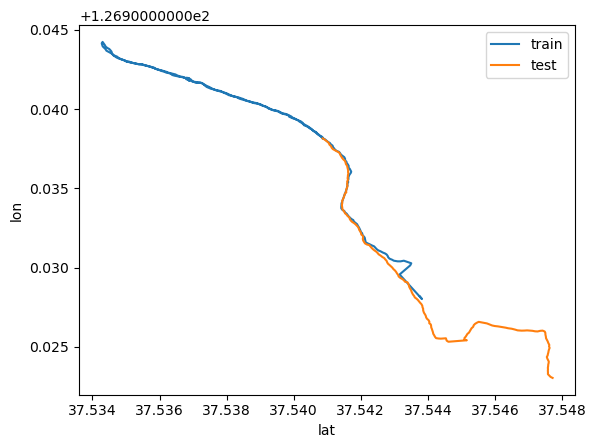

In [7]:
plt.plot(train_data['lat'],train_data['lon'])
plt.plot(test_data['lat'],test_data['lon'])
plt.legend(['train', 'test'])
plt.xlabel('lat')
plt.ylabel('lon')
plt.show()

변수 scaling

In [8]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()

train_sc = sc.fit_transform(train_data)
test_sc = sc.transform(test_data)

Pandas Dataframe으로 변환

In [9]:
train_sc_df = pd.DataFrame(train_sc, columns=['Scaled_lat','Scaled_lon'], index=train_data.index)
test_sc_df = pd.DataFrame(test_sc, columns=['Scaled_lat','Scaled_lon'], index=test_data.index)
train_sc_df.head()


,Scaled_lat,Scaled_lon
0,0.993891,0.009250
1,1.000000,0.000000
2,0.930180,0.095478
3,0.963344,0.130832
4,0.966661,0.139054


pandas shift를 통해 Window 만들기

In [10]:
w=int(input('원하는 window를 입력하시오 : '))
for s in range(1, w):
    train_sc_df['shift_{}_lat'.format(s)],train_sc_df['shift_{}_lon'.format(s)] = train_sc_df['Scaled_lat'].shift(s),train_sc_df['Scaled_lon'].shift(s)
    test_sc_df['shift_{}_lat'.format(s)],test_sc_df['shift_{}_lon'.format(s)] = test_sc_df['Scaled_lat'].shift(s),test_sc_df['Scaled_lon'].shift(s)

train_sc_df.head(13)


원하는 window를 입력하시오 : 10


,Scaled_lat,Scaled_lon,shift_1_lat,shift_1_lon,shift_2_lat,shift_2_lon,shift_3_lat,shift_3_lon,shift_4_lat,shift_4_lon,shift_5_lat,shift_5_lon,shift_6_lat,shift_6_lon,shift_7_lat,shift_7_lon,shift_8_lat,shift_8_lon,shift_9_lat,shift_9_lon
0,0.993891,0.009250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.000000,0.000000,0.993891,0.009250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.930180,0.095478,1.000000,0.000000,0.993891,0.009250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.963344,0.130832,0.930180,0.095478,1.000000,0.000000,0.993891,0.009250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.966661,0.139054,0.963344,0.130832,0.930180,0.095478,1.000000,0.000000,0.993891,0.009250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.953570,0.144913,0.966661,0.139054,0.963344,0.130832,0.930180,0.095478,1.000000,0.000000,0.993891,0.009250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.943446,0.149024,0.953570,0.144913,0.966661,0.139054,0.963344,0.130832,0.930180,0.095478,1.000000,0.000000,0.993891,0.009250,NaN,NaN,NaN,NaN,NaN,NaN
7,0.933147,0.146557,0.943446,0.149024,0.953570,0.144913,0.966661,0.139054,0.963344,0.130832,0.930180,0.095478,1.000000,0.000000,0.993891,0.009250,NaN,NaN,NaN,NaN
8,0.924071,0.146557,0.933147,0.146557,0.943446,0.149024,0.953570,0.144913,0.966661,0.139054,0.963344,0.130832,0.930180,0.095478,1.000000,0.000000,0.993891,0.009250,NaN,NaN
9,0.912201,0.149024,0.924071,0.146557,0.933147,0.146557,0.943446,0.149024,0.953570,0.144913,0.966661,0.139054,0.963344,0.130832,0.930180,0.095478,1.000000,0.000000,0.993891,0.009250


트레이닝셋과 테스트셋 만들기

In [11]:
k=w-1
X_train = train_sc_df.dropna().drop(['shift_{}_lat'.format(k),'shift_{}_lon'.format(k)], axis=1)
y_train = train_sc_df.dropna()[['shift_{}_lat'.format(k),'shift_{}_lon'.format(k)]]

X_test = test_sc_df.dropna().drop(['shift_{}_lat'.format(k),'shift_{}_lon'.format(k)], axis=1)
y_test = test_sc_df.dropna()[['shift_{}_lat'.format(k),'shift_{}_lon'.format(k)]]


In [12]:
X_train

,Scaled_lat,Scaled_lon,shift_1_lat,shift_1_lon,shift_2_lat,shift_2_lon,shift_3_lat,shift_3_lon,shift_4_lat,shift_4_lon,shift_5_lat,shift_5_lon,shift_6_lat,shift_6_lon,shift_7_lat,shift_7_lon,shift_8_lat,shift_8_lon
9,0.912201,0.149024,0.924071,0.146557,0.933147,0.146557,0.943446,0.149024,0.953570,0.144913,0.966661,0.139054,0.963344,0.130832,0.930180,0.095478,1.000000,0.000000
10,0.906266,0.153135,0.912201,0.149024,0.924071,0.146557,0.933147,0.146557,0.943446,0.149024,0.953570,0.144913,0.966661,0.139054,0.963344,0.130832,0.930180,0.095478
11,0.898935,0.156835,0.906266,0.153135,0.912201,0.149024,0.924071,0.146557,0.933147,0.146557,0.943446,0.149024,0.953570,0.144913,0.966661,0.139054,0.963344,0.130832
12,0.894746,0.161973,0.898935,0.156835,0.906266,0.153135,0.912201,0.149024,0.924071,0.146557,0.933147,0.146557,0.943446,0.149024,0.953570,0.144913,0.966661,0.139054
13,0.893001,0.167420,0.894746,0.161973,0.898935,0.156835,0.906266,0.153135,0.912201,0.149024,0.924071,0.146557,0.933147,0.146557,0.943446,0.149024,0.953570,0.144913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318,0.672020,0.643577,0.666434,0.649435,0.660674,0.654368,0.655612,0.659918,0.649503,0.663823,0.644790,0.668654,0.638855,0.672456,0.632047,0.675745,0.628731,0.681295
319,0.676383,0.638746,0.672020,0.643577,0.666434,0.649435,0.660674,0.654368,0.655612,0.659918,0.649503,0.663823,0.644790,0.668654,0.638855,0.672456,0.632047,0.675745
320,0.682667,0.634224,0.676383,0.638746,0.672020,0.643577,0.666434,0.649435,0.660674,0.654368,0.655612,0.659918,0.649503,0.663823,0.644790,0.668654,0.638855,0.672456
321,0.689126,0.630319,0.682667,0.634224,0.676383,0.638746,0.672020,0.643577,0.666434,0.649435,0.660674,0.654368,0.655612,0.659918,0.649503,0.663823,0.644790,0.668654


다시 ndarray로 변환하기

In [13]:
X_train=X_train.values
y_train=y_train.values
X_test=X_test.values
y_test=y_test.values

In [14]:
X_train.shape,y_train.shape

((314, 18), (314, 2))

최종 트레이닝셋과 테스트셋의 X 만들기

In [15]:
X_train_t = X_train.reshape(X_train.shape[0], k, 2)
X_test_t = X_test.reshape(X_test.shape[0],k, 2)
print("최종 DATA")
print(X_train_t.shape)
print(X_train_t)
print(y_train)


최종 DATA
(314, 9, 2)
[[[0.91220108 0.14902364]
  [0.92407052 0.14655704]
  [0.93314715 0.14655704]
  ...
  [0.96334439 0.13083248]
  [0.93017979 0.0954779 ]
  [1.         0.        ]]

 [[0.90626636 0.15313464]
  [0.91220108 0.14902364]
  [0.92407052 0.14655704]
  ...
  [0.96666085 0.13905447]
  [0.96334439 0.13083248]
  [0.93017979 0.0954779 ]]

 [[0.89893524 0.15683453]
  [0.90626636 0.15313464]
  [0.91220108 0.14902364]
  ...
  [0.95356956 0.14491264]
  [0.96666085 0.13905447]
  [0.96334439 0.13083248]]

 ...

 [[0.68266713 0.63422405]
  [0.67638331 0.63874615]
  [0.67201955 0.64357657]
  ...
  [0.64950253 0.66382323]
  [0.64478967 0.66865365]
  [0.63885495 0.67245632]]

 [[0.6891255  0.6303186 ]
  [0.68266713 0.63422405]
  [0.67638331 0.63874615]
  ...
  [0.6556118  0.65991778]
  [0.64950253 0.66382323]
  [0.64478967 0.66865365]]

 [[0.69017281 0.62476876]
  [0.6891255  0.6303186 ]
  [0.68266713 0.63422405]
  ...
  [0.66067377 0.65436793]
  [0.6556118  0.65991778]
  [0.64950253 0.66

LSTM 모델 만들기

In [16]:
from keras.layers import LSTM
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping

K.clear_session()
model = Sequential() # Sequeatial Model
model.add(LSTM(200, input_shape=(k, 2))) # (timestep, feature)
model.add(Dense(2)) # output = 1
model.compile(loss='mean_squared_error', optimizer='adam',metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 200)               162400    
_________________________________________________________________
dense (Dense)                (None, 2)                 402       
Total params: 162,802
Trainable params: 162,802
Non-trainable params: 0
_________________________________________________________________


In [17]:
p=int(input('patience : '))
#early_stop = EarlyStopping(monitor='loss',mode='min',patience=p, verbose=1)

result=model.fit(X_train_t, y_train, epochs=200,
          batch_size=32, verbose=1)
#, callbacks=[early_stop]


patience : 25
Epoch 1/200
10/10 [==============================] - 18s 8ms/step - loss: 0.2418 - accuracy: 0.8626
Epoch 2/200
10/10 [==============================] - 0s 8ms/step - loss: 0.0202 - accuracy: 0.9472
Epoch 3/200
10/10 [==============================] - 0s 7ms/step - loss: 0.0105 - accuracy: 0.9556
Epoch 4/200
10/10 [==============================] - 0s 7ms/step - loss: 0.0038 - accuracy: 0.9866
Epoch 5/200
10/10 [==============================] - 0s 7ms/step - loss: 0.0016 - accuracy: 0.9701
Epoch 6/200
10/10 [==============================] - 0s 7ms/step - loss: 9.5788e-04 - accuracy: 0.9713
Epoch 7/200
10/10 [==============================] - 0s 7ms/step - loss: 7.6481e-04 - accuracy: 0.9797
Epoch 8/200
10/10 [==============================] - 0s 7ms/step - loss: 6.1224e-04 - accuracy: 0.9755
Epoch 9/200
10/10 [==============================] - 0s 7ms/step - loss: 7.2232e-04 - accuracy: 0.9775
Epoch 10/200
10/10 [==============================] - 0s 7ms/step - loss: 5.56

In [18]:
print(result.history.keys())

dict_keys(['loss', 'accuracy'])


In [19]:
'''# summarize history for accuracy
plt.plot(result.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()'''

"# summarize history for accuracy\nplt.plot(result.history['accuracy'])\nplt.title('model accuracy')\nplt.ylabel('accuracy')\nplt.xlabel('epoch')\nplt.legend(['train', 'test'], loc='upper left')\nplt.show()"

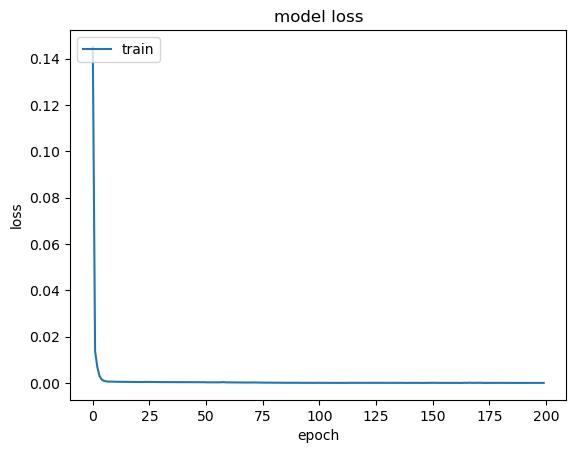

In [20]:
# summarize history for loss
plt.plot(result.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [21]:
y_pred = model.predict(X_test_t)
y_pred = sc.inverse_transform(y_pred)
y_pred_df = pd.DataFrame(y_pred, columns=['prediction_lat','prediction_lon'])
Y_test=sc.inverse_transform(y_test)

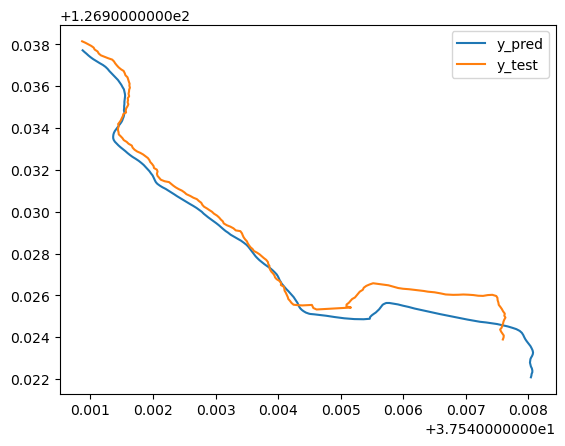

In [22]:
plt.plot(y_pred_df['prediction_lat'],y_pred_df['prediction_lon'])
plt.plot(Y_test[:,0],Y_test[:,1])
plt.legend(['y_pred', 'y_test'])
plt.show()

In [23]:
y_pred[-1]

array([ 37.54804, 126.92208], dtype=float32)

In [24]:
Y_test[1]

array([ 37.54092, 126.93808])

In [25]:
from math import radians, cos, sin, asin, sqrt

def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance in kilometers between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles. Determines return value units.
    return c * r

In [26]:
distance=haversine(Y_test[-1][0],Y_test[-1][1],y_pred[-1][0],y_pred[-1][1])

In [27]:
result_db = pd.DataFrame(columns = ['real', 'predict', 'distance','window_size','patience']) 
data_to_insert={'real': Y_test[-1], 'predict': y_pred[-1], 'distance': distance,'window_size': k+1,'patience': p}
result_db = result_db.append(data_to_insert, ignore_index=True)
result_db

,real,predict,distance,window_size,patience
0,"[37.54759, 126.92389]","[37.54804, 126.92208]",0.203371,10,25


In [28]:
import os

if os.path.isfile('result.txt'):
    with open("result.txt", "a") as file:
        result_db.to_csv('result.txt',sep = '\t', index = False,mode='a')
else:
    result_db.to_csv('result.txt',sep = '\t', index = False,mode='w')

지도에 표시

In [29]:
import pandas as pd
import folium
 
ASW_map = folium.Map(location=[Y_test[:,0].mean(),Y_test[:,1].mean()], zoom_start=13)
df_cities = pd.DataFrame({'위도':Y_test[:,0], '경도':Y_test[:,1]},index=[i for i in range(len(Y_test))])
 
for i in range(len(df_cities)):
    folium.Marker([df_cities.iloc[i][0], df_cities.iloc[i][1]], popup=df_cities.index[i]).add_to(ASW_map)
    
for i in range(len(y_pred)):
    folium.Marker(
        [y_pred[i][0],y_pred[i][1]],popup='predicted location',icon=folium.Icon(color='red',icon_color='blue')
    ).add_to(ASW_map)
    
'''    
folium.Marker(
    [df_cities.iloc[-1][0], df_cities.iloc[-1][1]],popup='last location',icon=folium.Icon(color='red',icon_color='blue')
).add_to(ASW_map)    '''


"    \nfolium.Marker(\n    [df_cities.iloc[-1][0], df_cities.iloc[-1][1]],popup='last location',icon=folium.Icon(color='red',icon_color='blue')\n).add_to(ASW_map)    "

In [30]:
ASW_map

In [31]:
ASW_map.save('ASW{}.html'.format(t))

Haversine

데이터

수집(차, 사람, 차+사람), 인터넷